In [16]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Выбрано распредиление chi^2 (хи-квадрат) с k степенями свободы, где k=6

In [17]:
chi_rv = sts.chi2(6)

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

In [18]:
sample = chi_rv.rvs(1000)

In [19]:
x = np.linspace(0,30,100)

In [20]:
pdf = chi_rv.pdf(x)

/home/tima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


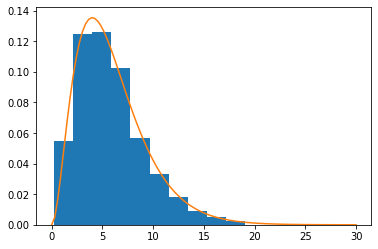

In [23]:
plt.hist(sample, normed=True, label = 'sample histogram')
plt.plot(x, pdf, label='theoretical pdf')

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

/home/tima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


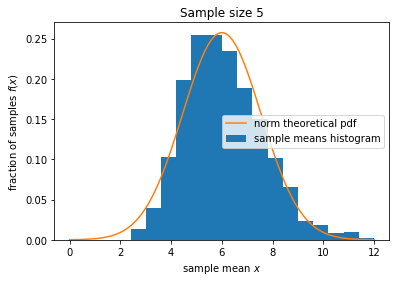

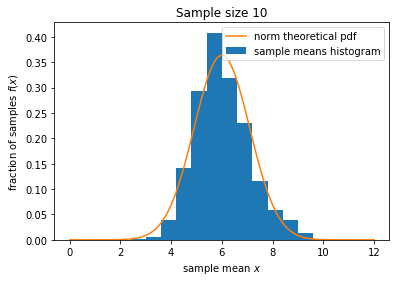

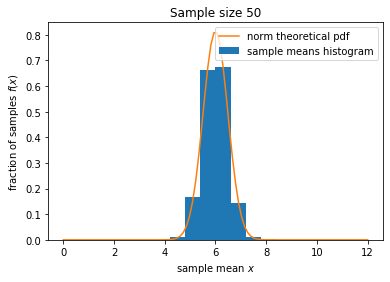

In [29]:
for n in [5, 10, 50]:
    # вычисляется сдеднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(chi_rv.rvs(n).mean())
    # и вырисовывается на графике
    plt.hist(sample_means, 20, normed=True, range=[0, 12], label='sample means histogram')
    # вычисляется pdf нормального распределения с данными параметрами (каждый раз одинково)
    norm_rv = sts.norm(6, np.sqrt(2.*6./n))
    x = np.linspace(0, 12, 100)
    pdf = norm_rv.pdf(x)
    # и вырисовывается на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    # легенда графика
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

При увеличении размера выборки n, распределение средних значений начинает сходиться к 6, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.

При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.